# Census Data Exploration - Inglewood Income Profile
By Nelson Guevara

### Introduction
In this assingment I will be creating an Income Profile for the City of Inglewood using 2019 Census Data. The project in itself is focused on the social and economic impacts that are facilitated with the development of major sports stadiums and arenas. To gain an understanding of the current state of Inglewood's housholds when it comes to income, I will be creating this profile to visualize the various levels of income and where those levels of income are in realtion to SoFi Stadium.

### Step 1
I will being by importing the libraries I will be using for this assingment. I will be importing geopandas, pandas, basemaps, and plots.

In [2]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

### Step 2
I now can import my census data.

In [3]:
income = gpd.read_file('Data/Income Data Inglewood 2019_Censustract.geojson')

### Step 3 
I now will begin to inspect my data to get a better idea of what it looks like.

In [4]:
income.shape

(33, 37)

In [5]:
income.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
0,14000US06037600501,"Census Tract 6005.01, Los Angeles, CA",871.0,48.0,27.0,28.0,27.0,20.0,43.0,31.0,...,39.0,110.0,54.0,49.0,27.0,92.0,46.0,59.0,33.0,"MULTIPOLYGON (((-118.32642 33.93293, -118.3264..."
1,14000US06037600502,"Census Tract 6005.02, Los Angeles, CA",635.0,30.0,25.0,20.0,17.0,18.0,6.0,8.0,...,18.0,105.0,57.0,45.0,40.0,69.0,39.0,31.0,26.0,"MULTIPOLYGON (((-118.33737 33.92796, -118.3373..."
2,14000US06037600601,"Census Tract 6006.01, Los Angeles, CA",920.0,46.0,22.0,24.0,37.0,29.0,32.0,26.0,...,65.0,91.0,45.0,74.0,41.0,113.0,44.0,28.0,20.0,"MULTIPOLYGON (((-118.32641 33.93870, -118.3264..."
3,14000US06037600602,"Census Tract 6006.02, Los Angeles, CA",696.0,43.0,67.0,44.0,46.0,26.0,64.0,36.0,...,33.0,36.0,26.0,33.0,28.0,12.0,17.0,13.0,16.0,"MULTIPOLYGON (((-118.33516 33.94108, -118.3351..."
4,14000US06037600702,"Census Tract 6007.02, Los Angeles, CA",1402.0,64.0,91.0,76.0,56.0,37.0,10.0,14.0,...,71.0,142.0,84.0,189.0,97.0,196.0,83.0,170.0,84.0,"MULTIPOLYGON (((-118.34393 33.95271, -118.3439..."


In [6]:
income.tail()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
28,14000US06037602003,"Census Tract 6020.03, Los Angeles, CA",1258.0,59.0,0.0,12.0,92.0,61.0,57.0,40.0,...,72.0,26.0,29.0,28.0,33.0,76.0,66.0,51.0,38.0,"MULTIPOLYGON (((-118.34390 33.93581, -118.3439..."
29,14000US06037602004,"Census Tract 6020.04, Los Angeles, CA",1052.0,40.0,18.0,20.0,54.0,44.0,86.0,48.0,...,62.0,78.0,50.0,57.0,34.0,8.0,12.0,32.0,34.0,"MULTIPOLYGON (((-118.33514 33.93102, -118.3351..."
30,14000US06037602104,"Census Tract 6021.04, Los Angeles, CA",1739.0,50.0,126.0,79.0,136.0,79.0,106.0,67.0,...,67.0,170.0,91.0,6.0,11.0,87.0,79.0,48.0,42.0,"MULTIPOLYGON (((-118.35247 33.93006, -118.3524..."
31,14000US06037703002,"Census Tract 7030.02, Los Angeles, CA",2859.0,150.0,200.0,142.0,66.0,82.0,87.0,77.0,...,127.0,330.0,142.0,130.0,75.0,298.0,151.0,712.0,190.0,"MULTIPOLYGON (((-118.38655 33.97716, -118.3862..."
32,16000US0636546,"Inglewood, CA",35997.0,780.0,2347.0,331.0,1872.0,287.0,1712.0,314.0,...,444.0,2905.0,365.0,1854.0,281.0,1796.0,210.0,1410.0,259.0,"MULTIPOLYGON (((-118.37625 33.98285, -118.3762..."


<AxesSubplot:>

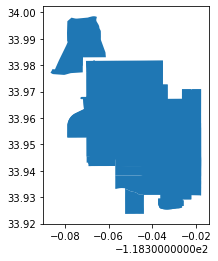

In [7]:
income.plot()

### Step 4
I want to view all of the columns in my data so I will change the options using the pandas module.

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Now I will generate a sample to make sure all of my columns are displaying.

In [9]:
income.sample()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",B19001005,"B19001005, Error",B19001006,"B19001006, Error",B19001007,"B19001007, Error",B19001008,"B19001008, Error",B19001009,"B19001009, Error",B19001010,"B19001010, Error",B19001011,"B19001011, Error",B19001012,"B19001012, Error",B19001013,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
2,14000US06037600601,"Census Tract 6006.01, Los Angeles, CA",920.0,46.0,22.0,24.0,37.0,29.0,32.0,26.0,16.0,13.0,37.0,23.0,30.0,22.0,60.0,35.0,35.0,27.0,13.0,14.0,53.0,25.0,88.0,31.0,191.0,65.0,91.0,45.0,74.0,41.0,113.0,44.0,28.0,20.0,"MULTIPOLYGON (((-118.32641 33.93870, -118.3264..."


### Step 5
Now that I have all of the columns displaying, I want to get information about my data and look at the dtypes and non-null counts. I will do this by running the .info() command.

In [10]:
income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             33 non-null     object  
 1   name              33 non-null     object  
 2   B19001001         33 non-null     float64 
 3   B19001001, Error  33 non-null     float64 
 4   B19001002         33 non-null     float64 
 5   B19001002, Error  33 non-null     float64 
 6   B19001003         33 non-null     float64 
 7   B19001003, Error  33 non-null     float64 
 8   B19001004         33 non-null     float64 
 9   B19001004, Error  33 non-null     float64 
 10  B19001005         33 non-null     float64 
 11  B19001005, Error  33 non-null     float64 
 12  B19001006         33 non-null     float64 
 13  B19001006, Error  33 non-null     float64 
 14  B19001007         33 non-null     float64 
 15  B19001007, Error  33 non-null     float64 
 16  B19001008         33

### Step 6 
Now that I have a better sense about the data within the columns, I want to make sure that there is no 'summary' row that can potentially skew my data. I will check the top and bottom of the geoid column for a geoid that differs from the rest of them. 

In [11]:
income.geoid.head()

0    14000US06037600501
1    14000US06037600502
2    14000US06037600601
3    14000US06037600602
4    14000US06037600702
Name: geoid, dtype: object

In [12]:
income.geoid.tail()

28    14000US06037602003
29    14000US06037602004
30    14000US06037602104
31    14000US06037703002
32        16000US0636546
Name: geoid, dtype: object

I see that in row 32 there is a different geoid so I will now drop that row of data since it is simply summarizing the rest of the rows in my data set.

In [13]:
income = income.drop([32])

Now I can double check my the top and bottom of my data to make sure that geoid is no longer in the data.

In [14]:
income.tail()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",B19001005,"B19001005, Error",B19001006,"B19001006, Error",B19001007,"B19001007, Error",B19001008,"B19001008, Error",B19001009,"B19001009, Error",B19001010,"B19001010, Error",B19001011,"B19001011, Error",B19001012,"B19001012, Error",B19001013,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
27,14000US06037601900,"Census Tract 6019, Los Angeles, CA",1238.0,66.0,138.0,78.0,30.0,32.0,72.0,59.0,13.0,16.0,26.0,43.0,125.0,74.0,44.0,37.0,43.0,46.0,103.0,67.0,101.0,69.0,159.0,86.0,210.0,84.0,97.0,72.0,36.0,35.0,14.0,22.0,27.0,37.0,"MULTIPOLYGON (((-118.34391 33.94545, -118.3434..."
28,14000US06037602003,"Census Tract 6020.03, Los Angeles, CA",1258.0,59.0,0.0,12.0,92.0,61.0,57.0,40.0,35.0,35.0,64.0,50.0,56.0,46.0,122.0,67.0,192.0,90.0,39.0,30.0,119.0,65.0,143.0,70.0,158.0,72.0,26.0,29.0,28.0,33.0,76.0,66.0,51.0,38.0,"MULTIPOLYGON (((-118.34390 33.93581, -118.3439..."
29,14000US06037602004,"Census Tract 6020.04, Los Angeles, CA",1052.0,40.0,18.0,20.0,54.0,44.0,86.0,48.0,81.0,56.0,44.0,39.0,48.0,38.0,64.0,41.0,32.0,31.0,57.0,46.0,91.0,44.0,147.0,60.0,155.0,62.0,78.0,50.0,57.0,34.0,8.0,12.0,32.0,34.0,"MULTIPOLYGON (((-118.33514 33.93102, -118.3351..."
30,14000US06037602104,"Census Tract 6021.04, Los Angeles, CA",1739.0,50.0,126.0,79.0,136.0,79.0,106.0,67.0,85.0,71.0,70.0,53.0,32.0,33.0,80.0,68.0,42.0,47.0,154.0,90.0,174.0,70.0,213.0,91.0,210.0,67.0,170.0,91.0,6.0,11.0,87.0,79.0,48.0,42.0,"MULTIPOLYGON (((-118.35247 33.93006, -118.3524..."
31,14000US06037703002,"Census Tract 7030.02, Los Angeles, CA",2859.0,150.0,200.0,142.0,66.0,82.0,87.0,77.0,99.0,78.0,96.0,108.0,18.0,28.0,53.0,46.0,79.0,101.0,69.0,51.0,113.0,81.0,195.0,109.0,314.0,127.0,330.0,142.0,130.0,75.0,298.0,151.0,712.0,190.0,"MULTIPOLYGON (((-118.38655 33.97716, -118.3862..."


### Step 7 - Sorting and Renaming columns
I want to begin sorting my columns and renaming them so that I can see what data I am looking at for each column. First, I will sort my columns to display the non-error columns. I begin by generating a list of the current columns:

In [15]:
list(income)

['geoid',
 'name',
 'B19001001',
 'B19001001, Error',
 'B19001002',
 'B19001002, Error',
 'B19001003',
 'B19001003, Error',
 'B19001004',
 'B19001004, Error',
 'B19001005',
 'B19001005, Error',
 'B19001006',
 'B19001006, Error',
 'B19001007',
 'B19001007, Error',
 'B19001008',
 'B19001008, Error',
 'B19001009',
 'B19001009, Error',
 'B19001010',
 'B19001010, Error',
 'B19001011',
 'B19001011, Error',
 'B19001012',
 'B19001012, Error',
 'B19001013',
 'B19001013, Error',
 'B19001014',
 'B19001014, Error',
 'B19001015',
 'B19001015, Error',
 'B19001016',
 'B19001016, Error',
 'B19001017',
 'B19001017, Error',
 'geometry']

Now I can sort them, and I sort by excluding the columns that had 'error' in them.

In [16]:
columns_sorted = ['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',                 
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

I can now generate my 'income' variable to include only the sorted columns.

In [17]:
income = income[columns_sorted]

In [18]:
income.head()

,geoid,name,B19001001,B19001002,B19001003,B19001004,B19001005,B19001006,B19001007,B19001008,B19001009,B19001010,B19001011,B19001012,B19001013,B19001014,B19001015,B19001016,B19001017,geometry
0,14000US06037600501,"Census Tract 6005.01, Los Angeles, CA",871.0,27.0,27.0,43.0,45.0,11.0,50.0,22.0,33.0,35.0,63.0,112.0,93.0,110.0,49.0,92.0,59.0,"MULTIPOLYGON (((-118.32642 33.93293, -118.3264..."
1,14000US06037600502,"Census Tract 6005.02, Los Angeles, CA",635.0,25.0,17.0,6.0,38.0,8.0,32.0,32.0,5.0,46.0,38.0,114.0,24.0,105.0,45.0,69.0,31.0,"MULTIPOLYGON (((-118.33737 33.92796, -118.3373..."
2,14000US06037600601,"Census Tract 6006.01, Los Angeles, CA",920.0,22.0,37.0,32.0,16.0,37.0,30.0,60.0,35.0,13.0,53.0,88.0,191.0,91.0,74.0,113.0,28.0,"MULTIPOLYGON (((-118.32641 33.93870, -118.3264..."
3,14000US06037600602,"Census Tract 6006.02, Los Angeles, CA",696.0,67.0,46.0,64.0,34.0,19.0,64.0,42.0,35.0,33.0,72.0,70.0,56.0,36.0,33.0,12.0,13.0,"MULTIPOLYGON (((-118.33516 33.94108, -118.3351..."
4,14000US06037600702,"Census Tract 6007.02, Los Angeles, CA",1402.0,91.0,56.0,10.0,36.0,10.0,76.0,28.0,23.0,33.0,79.0,113.0,150.0,142.0,189.0,196.0,170.0,"MULTIPOLYGON (((-118.34393 33.95271, -118.3439..."


Now I can finally rename each column. I am able to do this by opening the metadata.json file and cross referencing the names associated with each column and paste them into the *income.columns* command.

In [19]:
income.columns = ['geoid',
 'name',
 'Total',
 'Less than $10,000',
 '$10,000 to 14,999',
 '$15,000 to 19,999',
 '$20,000 to 24,999',
 '$25,000 to 29,999',
 '$30,000 to 34,999',
 '$35,000 to 39,999',
 '$40,000 to 44,999',
 '$45,000 to 49,999',                
 '$50,000 to 59,999',
 '$60,000 to 74,999',
 '$75,000 to 99,999',
 '$100,000 to 124,999',
 '$125,000 to 149,999', 
 '$150,000 to 199,999',
 '$200,000 or more',
 'geometry']

In [21]:
income['under $30,0000'] = income['Less than $10,000'] + income['$10,000 to 14,999'] + income['$15,000 to 19,999'] + income['$20,000 to 24,999'] + income['$25,000 to 29,999']
income['$30,000 - $59,999'] = income['$30,000 to 34,999'] + income['$35,000 to 39,999'] + income['$40,000 to 44,999'] + income['$45,000 to 49,999'] + income['$50,000 to 59,999']
income['$60,000 - $99,999'] = income['$60,000 to 74,999'] + income['$75,000 to 99,999']
income['$100,000 - $149,999'] = income['$100,000 to 124,999'] + income['$125,000 to 149,999']
income['$150,000 and above'] = income['$150,000 to 199,999'] + income['$200,000 or more']

I double check that my columns have been renamed by running the *.head* command.

In [22]:
income.head()

,geoid,name,Total,"Less than $10,000","$10,000 to 14,999","$15,000 to 19,999","$20,000 to 24,999","$25,000 to 29,999","$30,000 to 34,999","$35,000 to 39,999","$40,000 to 44,999","$45,000 to 49,999","$50,000 to 59,999","$60,000 to 74,999","$75,000 to 99,999","$100,000 to 124,999","$125,000 to 149,999","$150,000 to 199,999","$200,000 or more",geometry,"under $30,0000","$30,000 - $59,999","$60,000 - $99,999","$100,000 - $149,999","$150,000 and above"
0,14000US06037600501,"Census Tract 6005.01, Los Angeles, CA",871.0,27.0,27.0,43.0,45.0,11.0,50.0,22.0,33.0,35.0,63.0,112.0,93.0,110.0,49.0,92.0,59.0,"MULTIPOLYGON (((-118.32642 33.93293, -118.3264...",153.0,203.0,205.0,159.0,151.0
1,14000US06037600502,"Census Tract 6005.02, Los Angeles, CA",635.0,25.0,17.0,6.0,38.0,8.0,32.0,32.0,5.0,46.0,38.0,114.0,24.0,105.0,45.0,69.0,31.0,"MULTIPOLYGON (((-118.33737 33.92796, -118.3373...",94.0,153.0,138.0,150.0,100.0
2,14000US06037600601,"Census Tract 6006.01, Los Angeles, CA",920.0,22.0,37.0,32.0,16.0,37.0,30.0,60.0,35.0,13.0,53.0,88.0,191.0,91.0,74.0,113.0,28.0,"MULTIPOLYGON (((-118.32641 33.93870, -118.3264...",144.0,191.0,279.0,165.0,141.0
3,14000US06037600602,"Census Tract 6006.02, Los Angeles, CA",696.0,67.0,46.0,64.0,34.0,19.0,64.0,42.0,35.0,33.0,72.0,70.0,56.0,36.0,33.0,12.0,13.0,"MULTIPOLYGON (((-118.33516 33.94108, -118.3351...",230.0,246.0,126.0,69.0,25.0
4,14000US06037600702,"Census Tract 6007.02, Los Angeles, CA",1402.0,91.0,56.0,10.0,36.0,10.0,76.0,28.0,23.0,33.0,79.0,113.0,150.0,142.0,189.0,196.0,170.0,"MULTIPOLYGON (((-118.34393 33.95271, -118.3439...",203.0,239.0,263.0,331.0,366.0


In [23]:
new_columns_to_keep = ['geoid',        # These are the columns I am deciding to keep
    'name',
    'Total',
    'under $30,0000',                   
    '$30,000 - $59,999',
    '$60,000 - $99,999',
    '$100,000 - $149,999',
    '$150,000 and above',
    'geometry']

In [25]:
income = income[new_columns_to_keep]
income.sample()

,geoid,name,Total,"under $30,0000","$30,000 - $59,999","$60,000 - $99,999","$100,000 - $149,999","$150,000 and above",geometry
0,14000US06037600501,"Census Tract 6005.01, Los Angeles, CA",871.0,153.0,203.0,205.0,159.0,151.0,"MULTIPOLYGON (((-118.32642 33.93293, -118.3264..."


### Step 8 - Checking Data Integrity
I want to make sure that my data has not been damaged in the process so far so I will run some basic data descriptive commands with a generted sample. I begin by generating one sample and creating a variable for that sample.

In [26]:
random_tract = income.sample()
random_tract

,geoid,name,Total,"under $30,0000","$30,000 - $59,999","$60,000 - $99,999","$100,000 - $149,999","$150,000 and above",geometry
13,14000US06037601002,"Census Tract 6010.02, Los Angeles, CA",1894.0,441.0,682.0,553.0,145.0,73.0,"MULTIPOLYGON (((-118.35259 33.95316, -118.3525..."


Now that I have a variable for that sample generated , I will use the "Total" column to reference that my data adds up correctly. The sample census tract that I generated has a total of 1127 households:

In [27]:
random_tract.iloc[0]['Total']

1894.0

I want to make sure I understand the previous code in plain english so I will use the print command to make it clear that the total number of households in this census tract is 1127.

In [28]:
print('Total Households: ' + str(random_tract.iloc[0]['Total']))

Total Households: 1894.0


Now I can check the integrity of my data by adding the rest of the columns together. I expect it to (and hope) add up to 1127 households.

In [34]:
print(random_tract.iloc[0]['under $30,0000'] + 
      random_tract.iloc[0]['$30,000 - $59,999'] + 
      random_tract.iloc[0]['$60,000 - $99,999'] + 
      random_tract.iloc[0]['$100,000 - $149,999'] + 
      random_tract.iloc[0]['$150,000 and above'])

1894.0


### Step 9 - Simple Data Statistics
It does add up to 1127 and now I can begin doing more data descriptions for the "Total" column. I will first generate the average number of households in the entire city of Inglewood by using the *.mean* command.

In [35]:
income['Total'].mean()

1376.09375

I now know what the average number of households is, but I also want to know what the median is. I can generate that information through the *.median* command.

In [36]:
income['Total'].median()

1223.5

I can take a step further and genarete other information such as the standard deviation, the minimum, the max, and the percentiles for total number of households.

In [37]:
income['Total'].describe()

count      32.000000
mean     1376.093750
std       585.193233
min       635.000000
25%       993.000000
50%      1223.500000
75%      1730.750000
max      2859.000000
Name: Total, dtype: float64

I want to create a histogram of the total number of households so I can have a visual representation of how frequent a number of total households is present in the data. After I run the *.plot.hist* command I can see that the most frequent total number of households is somewhere in the middle between 1000 and 1500.

<AxesSubplot:ylabel='Frequency'>

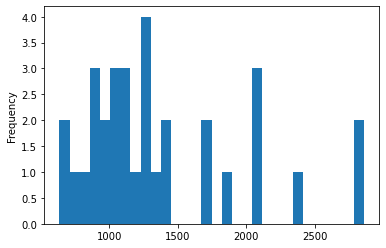

In [38]:
income['Total'].plot.hist(bins=30)

### Step 10 - Data Sorting and Initial Income Plots
I want to begin mapping some of the data that I have, but first I want to sort the total number of households from highest to lowest so that I have a base of reference when looking at the income levels. Even though I have the percentages, I want to be able to map the ten most populated census tracts. 

I begin by sorting the values from highest to lowest with the following command:

In [40]:
income_sorted = income.sort_values(by='Total',ascending = False)

In [41]:
income_sorted[['geoid','Total']].head(10)

,geoid,Total
31,14000US06037703002,2859.0
19,14000US06037601302,2795.0
9,14000US06037600902,2375.0
14,14000US06037601100,2104.0
20,14000US06037601303,2075.0
17,14000US06037601212,2068.0
13,14000US06037601002,1894.0
30,14000US06037602104,1739.0
21,14000US06037601401,1728.0
11,14000US06037600912,1447.0


Now that I have the census tracts with the most households, I want to plot them so I have a visual representation of where these tracts are located within Inglewood.

<AxesSubplot:>

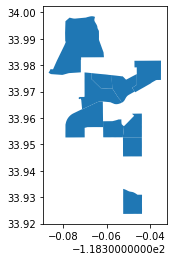

In [42]:
income_sorted.head(10).plot()

Having total household information is great, but now I want to start looking at certain income levels. For the purpose of this assignemnt I will focus on the data for 20,000 to 24,999 dollars and 75,000 to 99,999 dollars. 

I begin by plotting the data for the number of households that earned between 20,000 and 24,999 dollars for all of the census tracts in Inglewood:

<AxesSubplot:>

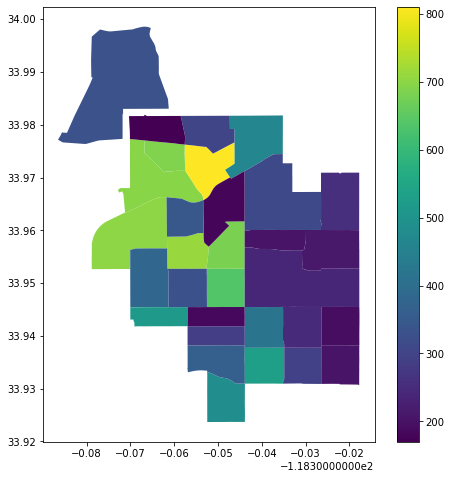

In [43]:
income_sorted.head(31).plot(figsize=(8,8),column='$30,000 - $59,999',legend=True)

I will now do the same but for the households that earned between 75,000 and 99,999 dollars.

<AxesSubplot:>

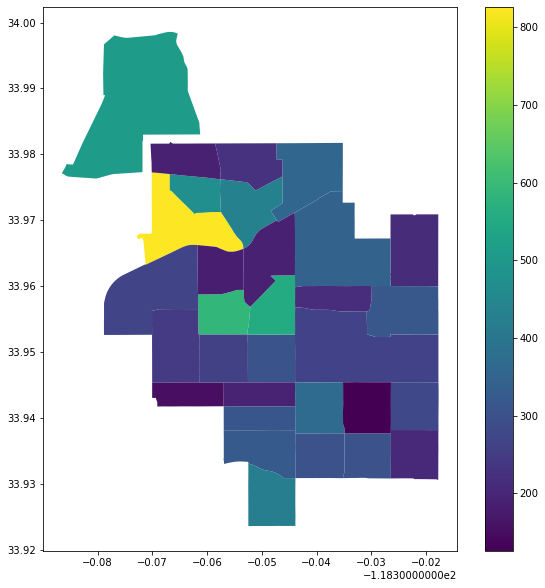

In [50]:
income_sorted.head(31).plot(figsize=(10,10),column='$60,000 - $99,999',legend=True)

### Step 11 - Normalizing the Data

These are great, but it is also limited. It simply plotted the raw number for each of those two categories without being able to determine what those numbers mean within these census tracts and all of Inglewood.

I will try to normalize the data so that it can provide a bigger picture about what these numbers mean.

I will do this by creating new columns with the percentage for each income bracket.

In [51]:
list(income)

['geoid',
 'name',
 'Total',
 'under $30,0000',
 '$30,000 - $59,999',
 '$60,000 - $99,999',
 '$100,000 - $149,999',
 '$150,000 and above',
 'geometry',
 'Percent Less than $30,000',
 'Percent $30,000 - $59,999',
 'Percent $60,000 - $99,999',
 'Percent $100,000 - $149,999',
 'Percent $150,000 and above']

In [52]:
income['Percent Less than $30,000'] = income['under $30,0000']/income['Total']*100
income['Percent $30,000 - $59,999'] = income['$30,000 - $59,999']/income['Total']*100
income['Percent $60,000 - $99,999'] = income['$60,000 - $99,999']/income['Total']*100
income['Percent $100,000 - $149,999'] = income['$100,000 - $149,999']/income['Total']*100
income['Percent $150,000 and above'] = income['$150,000 and above']/income['Total']*100

In the cell above I created new percentage columns by taking the number of households that fall into each category and dividing them by the total followed by multiplying by 100. This gives me the percentage of households that fall into each category.

I generate a sample to view my new columns.

In [53]:
income.sample(5)

,geoid,name,Total,"under $30,0000","$30,000 - $59,999","$60,000 - $99,999","$100,000 - $149,999","$150,000 and above",geometry,"Percent Less than $30,000","Percent $30,000 - $59,999","Percent $60,000 - $99,999","Percent $100,000 - $149,999","Percent $150,000 and above"
19,14000US06037601302,"Census Tract 6013.02, Los Angeles, CA",2795.0,826.0,695.0,826.0,289.0,159.0,"MULTIPOLYGON (((-118.37282 33.96765, -118.3723...",29.552773,24.865832,29.552773,10.339893,5.688730
29,14000US06037602004,"Census Tract 6020.04, Los Angeles, CA",1052.0,283.0,292.0,302.0,135.0,40.0,"MULTIPOLYGON (((-118.33514 33.93102, -118.3351...",26.901141,27.756654,28.707224,12.832700,3.802281
4,14000US06037600702,"Census Tract 6007.02, Los Angeles, CA",1402.0,203.0,239.0,263.0,331.0,366.0,"MULTIPOLYGON (((-118.34393 33.95271, -118.3439...",14.479315,17.047076,18.758916,23.609130,26.105563
23,14000US06037601501,"Census Tract 6015.01, Los Angeles, CA",1084.0,330.0,517.0,152.0,67.0,18.0,"MULTIPOLYGON (((-118.37004 33.94486, -118.3700...",30.442804,47.693727,14.022140,6.180812,1.660517
27,14000US06037601900,"Census Tract 6019, Los Angeles, CA",1238.0,279.0,416.0,369.0,133.0,41.0,"MULTIPOLYGON (((-118.34391 33.94545, -118.3434...",22.536349,33.602585,29.806139,10.743134,3.311793


Now I want to plot the percentages for the same data columns I used previously. 

I do this for 20,000 to 24,999 dollars and 75,000 to 99,999 dollars. I plot them in the equal interval scheme so that the different categories are evenly grouped.

<AxesSubplot:>

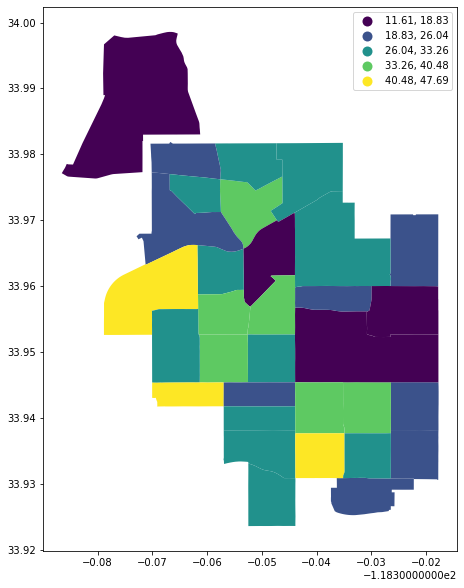

In [49]:
income.plot(figsize=(12,10),
                 column='Percent $30,000 - $59,999',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot:>

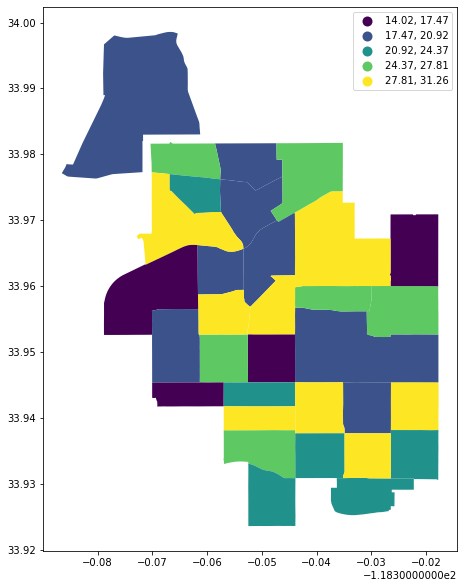

In [54]:
income.plot(figsize=(12,10),
                 column='Percent $60,000 - $99,999',
                 legend=True, 
                 scheme='equal_interval')

### Step 12 - Mapping

I can now begin mapping some of the data that I have normalized.

I begin by creating the same two plots I created in the previous step. I want them to be next to each other so that it is easier to view and compare.

Text(0.5, 1.0, 'Percent 60,000 to 99,999 Income Range')

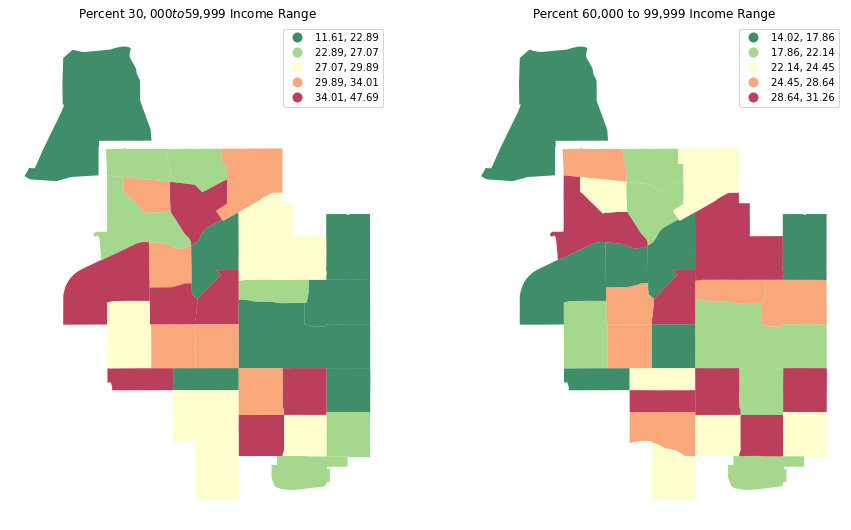

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

ax1, ax2 = axs

income.plot(column='Percent $30,000 - $59,999', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent $30,000 to $59,999 Income Range")

income.plot(column='Percent $60,000 - $99,999', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, 
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent 60,000 to 99,999 Income Range")

These two plots next to each other now are able to provide a better visual of the differences for each of the two income categories I plotted. I can see that generally there is a higher concentration of households that ar withtin the 20,000 to 24,999 doallrs range in the southern part of Inglewood, and a higher concentration of households earning between 75,000 to 99,999 dollars in the northern part of Inglewood, for the most part.

Now I want to see a certain percentage and above of the households that earn between 20,000 and 24,999. I will now generate a data frame that shows me the census tracts with more than 5% of households earning between 20,000 and 24,999 dollars.

In [67]:
income[income['Percent $30,000 - $59,999'] > 25]

,geoid,name,Total,"under $30,0000","$30,000 - $59,999","$60,000 - $99,999","$100,000 - $149,999","$150,000 and above",geometry,"Percent Less than $30,000","Percent $30,000 - $59,999","Percent $60,000 - $99,999","Percent $100,000 - $149,999","Percent $150,000 and above"
3,14000US06037600602,"Census Tract 6006.02, Los Angeles, CA",696.0,230.0,246.0,126.0,69.0,25.0,"MULTIPOLYGON (((-118.33516 33.94108, -118.3351...",33.045977,35.344828,18.103448,9.913793,3.591954
8,14000US06037600802,"Census Tract 6008.02, Los Angeles, CA",1127.0,168.0,310.0,345.0,165.0,139.0,"MULTIPOLYGON (((-118.34405 33.97116, -118.3428...",14.906832,27.506655,30.612245,14.640639,12.333629
9,14000US06037600902,"Census Tract 6009.02, Los Angeles, CA",2375.0,844.0,810.0,430.0,182.0,109.0,"MULTIPOLYGON (((-118.35764 33.97457, -118.3576...",35.536842,34.105263,18.105263,7.663158,4.589474
10,14000US06037600911,"Census Tract 6009.11, Los Angeles, CA",1124.0,262.0,301.0,226.0,198.0,137.0,"MULTIPOLYGON (((-118.35854 33.98167, -118.3579...",23.309609,26.779359,20.106762,17.615658,12.188612
11,14000US06037600912,"Census Tract 6009.12, Los Angeles, CA",1447.0,319.0,464.0,353.0,193.0,118.0,"MULTIPOLYGON (((-118.34784 33.97174, -118.3472...",22.045612,32.066344,24.395301,13.337941,8.154803
13,14000US06037601002,"Census Tract 6010.02, Los Angeles, CA",1894.0,441.0,682.0,553.0,145.0,73.0,"MULTIPOLYGON (((-118.35259 33.95316, -118.3525...",23.284055,36.008448,29.197466,7.655755,3.854277
14,14000US06037601100,"Census Tract 6011, Los Angeles, CA",2104.0,873.0,636.0,304.0,193.0,98.0,"MULTIPOLYGON (((-118.35256 33.95271, -118.3525...",41.492395,30.228137,14.448669,9.173004,4.657795
15,14000US06037601202,"Census Tract 6012.02, Los Angeles, CA",978.0,125.0,329.0,260.0,93.0,171.0,"MULTIPOLYGON (((-118.36152 33.95270, -118.3605...",12.781186,33.640082,26.584867,9.509202,17.484663
16,14000US06037601211,"Census Tract 6012.11, Los Angeles, CA",1050.0,359.0,344.0,184.0,144.0,19.0,"MULTIPOLYGON (((-118.36177 33.96619, -118.3617...",34.190476,32.761905,17.523810,13.714286,1.809524
17,14000US06037601212,"Census Tract 6012.12, Los Angeles, CA",2068.0,585.0,712.0,587.0,161.0,23.0,"MULTIPOLYGON (((-118.36166 33.95878, -118.3608...",28.288201,34.429400,28.384913,7.785300,1.112186


There are a total of 14 census tracts in Inglewood that have over 5% of households earning between 20,000 and 24,999 dollars. I will now map this information with a basemap so that I can geographically locate these areas within Inglewood.

I will add a basemap by using the contextily library.

In [68]:
income_web_mercator = income.to_crs(epsg=3857)

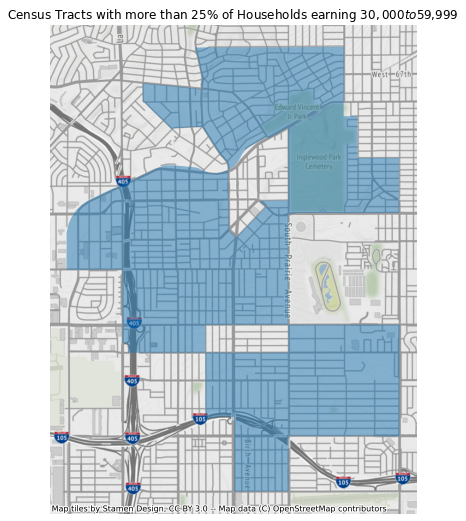

In [71]:
fig, ax = plt.subplots(figsize=(9, 9))

income_web_mercator[income_web_mercator['Percent $30,000 - $59,999'] > 25 ].plot(ax=ax, alpha=0.5)

ax.axis('off')

ax.set_title('Census Tracts with more than 25% of Households earning $30,000 to $59,999',fontsize=12)

ctx.add_basemap(ax)

# Results and Considerations

This map shows me the areas within Inglewood in which over 5% of households earn between 20,000 and 24,999. Additionally the entire data when normalized is able to tell a more informative story about the different levlels of income in Inglewood. It also helps with comparing different census tracts. Something that it is hard to do with just the raw number of householdd that fall into each category. 

Some limitations in this exceercise is not being able to group certain categories together. I say this because in my basemap the 5% seems very low. This is becasue the data or percentages are being seperated into 16 or 17 different groups. In the future I could potentially create income brackets for low income, middle class income, high middle class, and high income by grouping some of the intervals from this data together. This would help create more meaningful visual represenations that make more sense when discussing social issues.